## CNN & More

---

### 라이브러리 로딩

In [11]:
import random as rd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


id=8549
다음 그림의 숫자 1입니다.


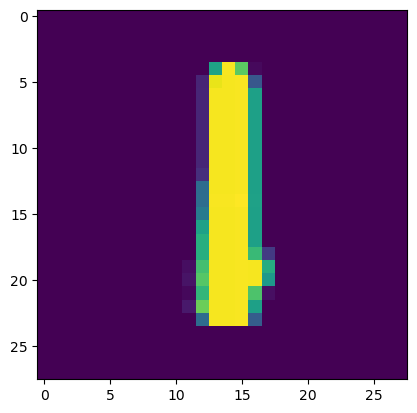

In [4]:
# 이미지 확인
id = rd.randrange(0, 10000)
print(f'id={id}')
print(f'다음 그림의 숫자 {test_y[id]}입니다.')

plt.imshow(test_x[id])
plt.show()

- validation set 만들어주기

In [5]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=2023)

- One-hot Encoding

In [6]:
from tensorflow.keras.utils import to_categorical
class_n = len(np.unique(train_y))

train_y = to_categorical(train_y, class_n)
val_y = to_categorical(val_y, class_n)
test_y = to_categorical(test_y, class_n)

train_y.shape

(54000, 10)

In [7]:
# x: 흑백임을 명시하기 위한 차원 추가
train_x = np.expand_dims(train_x, axis=-1)
val_x = np.expand_dims(val_x, axis=-1)
test_x = np.expand_dims(test_x, axis=-1)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(54000, 28, 28, 1) (54000, 10) (10000, 28, 28, 1) (10000, 10)


- 이미지 값이 0~1 사이의 값을 갖도록 스케일 조정!

In [8]:
print('max: ' , train_x.max(), ' min: ', train_x.min())

max:  255  min:  0


In [9]:
max_v, min_v = train_x.max(), train_x.min()

train_x = (train_x - min_v) / (max_v - min_v)
test_x = (test_x - min_v) / (max_v - min_v)

print('max :', train_x.max(),'  min :', train_x.min())

max : 1.0   min : 0.0


---

### CNN 모델링

In [12]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
clear_session()

# model에 순차적으로 레이어를 쌓아가겠다는 의도!
model = keras.models.Sequential()

model.add( Input(shape=(28,28,1)) )
model.add( Conv2D(filters=32,
                  kernel_size=(3, 3),
                  activation='relu') )
model.add( Conv2D(filters=32,
                  kernel_size=(3,3),
                  activation='relu') )
model.add( MaxPool2D((2,2)) )
model.add( Dropout(0.20) )

model.add( Conv2D(filters=64,
                  kernel_size=(3, 3),
                  activation='relu',
                  padding='same') )
model.add( Conv2D(filters=64,
                  kernel_size=(3, 3),
                  activation='relu',
                  padding='same') )
model.add( MaxPool2D((2,2)) )
model.add( Dropout(0.25) )

model.add( Conv2D(filters=128,
                  kernel_size=(3, 3),
                  activation='relu',
                  padding='same') )
model.add( Dropout(0.25) )

model.add( Flatten() )
model.add( Dense(128, activation = 'relu') )
model.add( BatchNormalization()  )
model.add( Dropout(0.25) )
model.add( Dense(10, activation = 'softmax') )

# 모델 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [13]:
# 모델 컴파일

model.compile(loss = keras.losses.categorical_crossentropy, metrics=['accuracy'],
              optimizer = 'adam')